In [14]:
#VERİ ANALİZİNİN EN ÖNEMLİ AŞAMAALRINDAN BİRİ VERİ GÖRSELLEŞTİRMEDİR
#VERİ GÖRSELLEŞTRİME İLE VERİLERLİMİZİ DAHA İYİ ANLAYABİLİRİZ VE DAHA İYİ MODELLER KURABİLİRİZ
#2023 VERİ BİLİMİ MAAŞLARI VERİ SETİNİ ELE ALACAĞIZ VE VERİ GÖRSELLEŞTRİME TEKNİKLERİ İLE MAAŞLARI İNCELEYECEĞİZ


SyntaxError: invalid syntax (<ipython-input-14-b6f67dd9df23>, line 4)

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("ds_salaries.csv")
df.head()
#veri setimizi yükledik ve veri setimizin ilk 5 satırını ekrana yazdırdık !!!

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [3]:
#sütunları iyi tanımak önemlidir!!!
#şimdi veri seitndeki satır ve sütun sayılarına bakalım
df.shape
#veri setinde 3755 satır ve 11 adet de sütun olduğunu gördük 

(3755, 11)

In [4]:
df.info()
#satır ve sütunların özelliklerini incelemek için bu metodu kullanabiliriz!!!
#veri setindeki eksik veriler önemlidir!!!
#şu anda veri setinde eksik veri görülmüyor
#eksik veirleri kontrol etmek için ise isnull() modulünü kullanabilriiz!!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [5]:
df.isnull()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
3750,False,False,False,False,False,False,False,False,False,False,False
3751,False,False,False,False,False,False,False,False,False,False,False
3752,False,False,False,False,False,False,False,False,False,False,False
3753,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [7]:
df.isnull().sum().sum()
#bu metod ile tüm verideki eksik verileri görebiliriz!!!

0

In [8]:
#şimdi ise sütunlardaki tek değerlere bakmamız gerekmektedir
df.nunique()

work_year                4
experience_level         4
employment_type          4
job_title               93
salary                 815
salary_currency         20
salary_in_usd         1035
employee_residence      78
remote_ratio             3
company_location        72
company_size             3
dtype: int64

In [9]:
df.work_year.value_counts()
#bu kodu çalıştırınca yıl sütunundaki tek değerlerin sayısı karşımza gelmektedir!!!

2023    1785
2022    1664
2021     230
2020      76
Name: work_year, dtype: int64

In [10]:
#önce matplotlib import ettik 
#seaborn import ettik 
#sns.set_theme() metodunu kullanarak grafiğin temalarını ayarlamak istiyoruz
#grafiklerin metodunu ayarlayabilmek için figure.figsize kullanıdk boyutu (10,6) oldu 
#grafiğin kalitesini figure.dpi kullandık 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set(rc={"figure.figsize":(10,6),"figure.dpi":300})

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

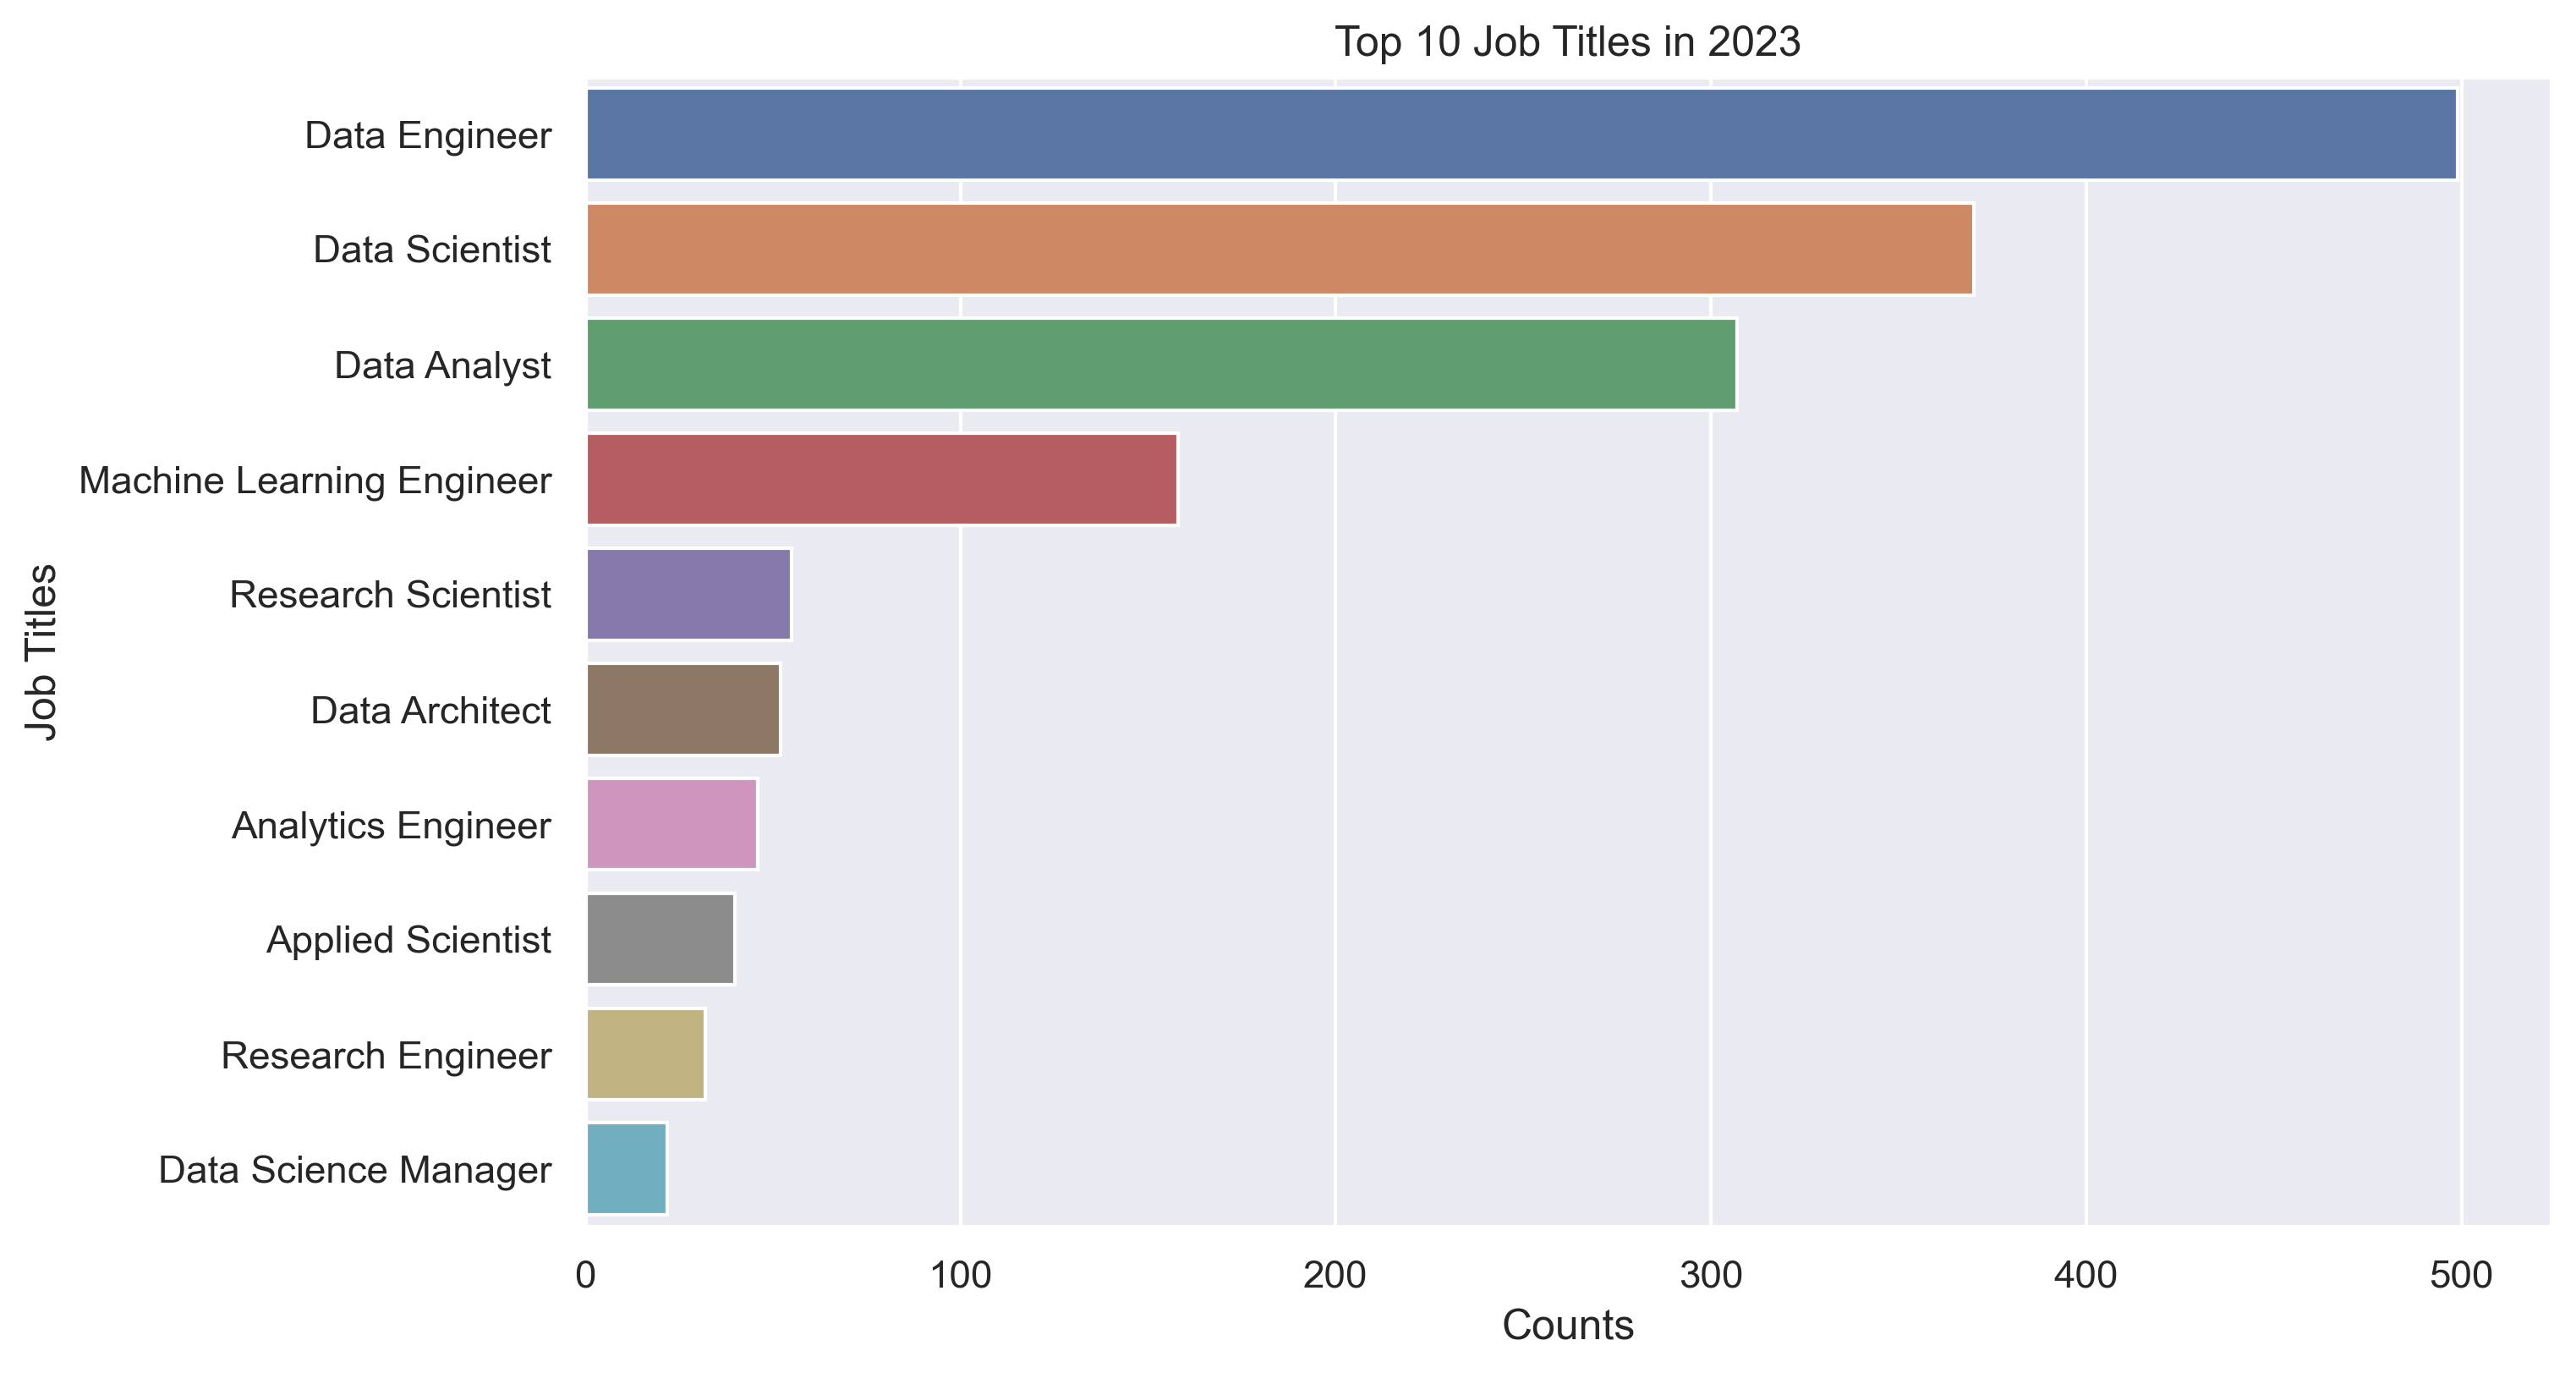

In [11]:
#job_title : 93 görüldüğü üzere 93 adet veriye dayalı meslek vardır!!
#şimdi en fazla talep gören ilk 10 mesleği inceleyelim 
jobs=df[df["work_year"]==2023]["job_title"].value_counts().nlargest(10).reset_index()
fig,ax=plt.subplots() #fig adında bir grafik nesnesi oluşturduk ; bu nesnenin içerisinde ax isminde grafik oluşturduk ve alt grafik için subplot yaptık

ax=sns.barplot(ax=ax,data=df,y=jobs["index"],x=jobs.job_title) #seaborn ile sütun grafiği çizdiyooruz
#x-y eksanlerine değerlerini atadık 
ax.set(ylabel="Job Titles" , xlabel="Counts",title="Top 10 Job Titles in 2023") #şimdi burada eksenlere ve grafiğe isim veriyoruz
#y eksenine isim verirken ylabel="" x eksenine isim verirken xlabel="" dedikm 
#title ise başlık koyduk 

ax.bar_label(ax.containers[0],padding=2) #ek olarak grafiğer mesleklerin sayısını da ekledik !!!

#iş_yılı sütununu seçtik önce ardından yılımızı (2023) seçtik daha sonra job_title seçtik
#daha sonra ise bu seçtiğimiz sütunlardaki kategorileri bulmak için value_counts() metodunu kullandık 
#ardından nlargest(10) yaparak ilk 10 değeri seçtik ve en son bu seçtiğimiz değerlerin indexlerini resetledik

#şimdi bu seçtiğimiz mesleklerin verilerini görselleştirelim


In [16]:
df["experience_level"].unique()
#df'de experience_level sütununu seçtik 
#ardından unique() metodnu kullandık 
#4 farklı tecrübe kategorisi olduğunu gördük bunlar kısaltmılmış halde bunların uzun değerlerini yazalım


array(['SE', 'MI', 'EN', 'EX'], dtype=object)

In [17]:
#şimdi bunların uzun değerleirni yazarken önce değerini aldık sonra replace ile değişiklikleri yaptık
df["experience_level"]=df["experience_level"].replace("EN","Junior")
df["experience_level"]=df["experience_level"].replace("MI","Mid-Level")
df["experience_level"]=df["experience_level"].replace("SE","Senior")
df["experience_level"]=df["experience_level"].replace("EX","Director")

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

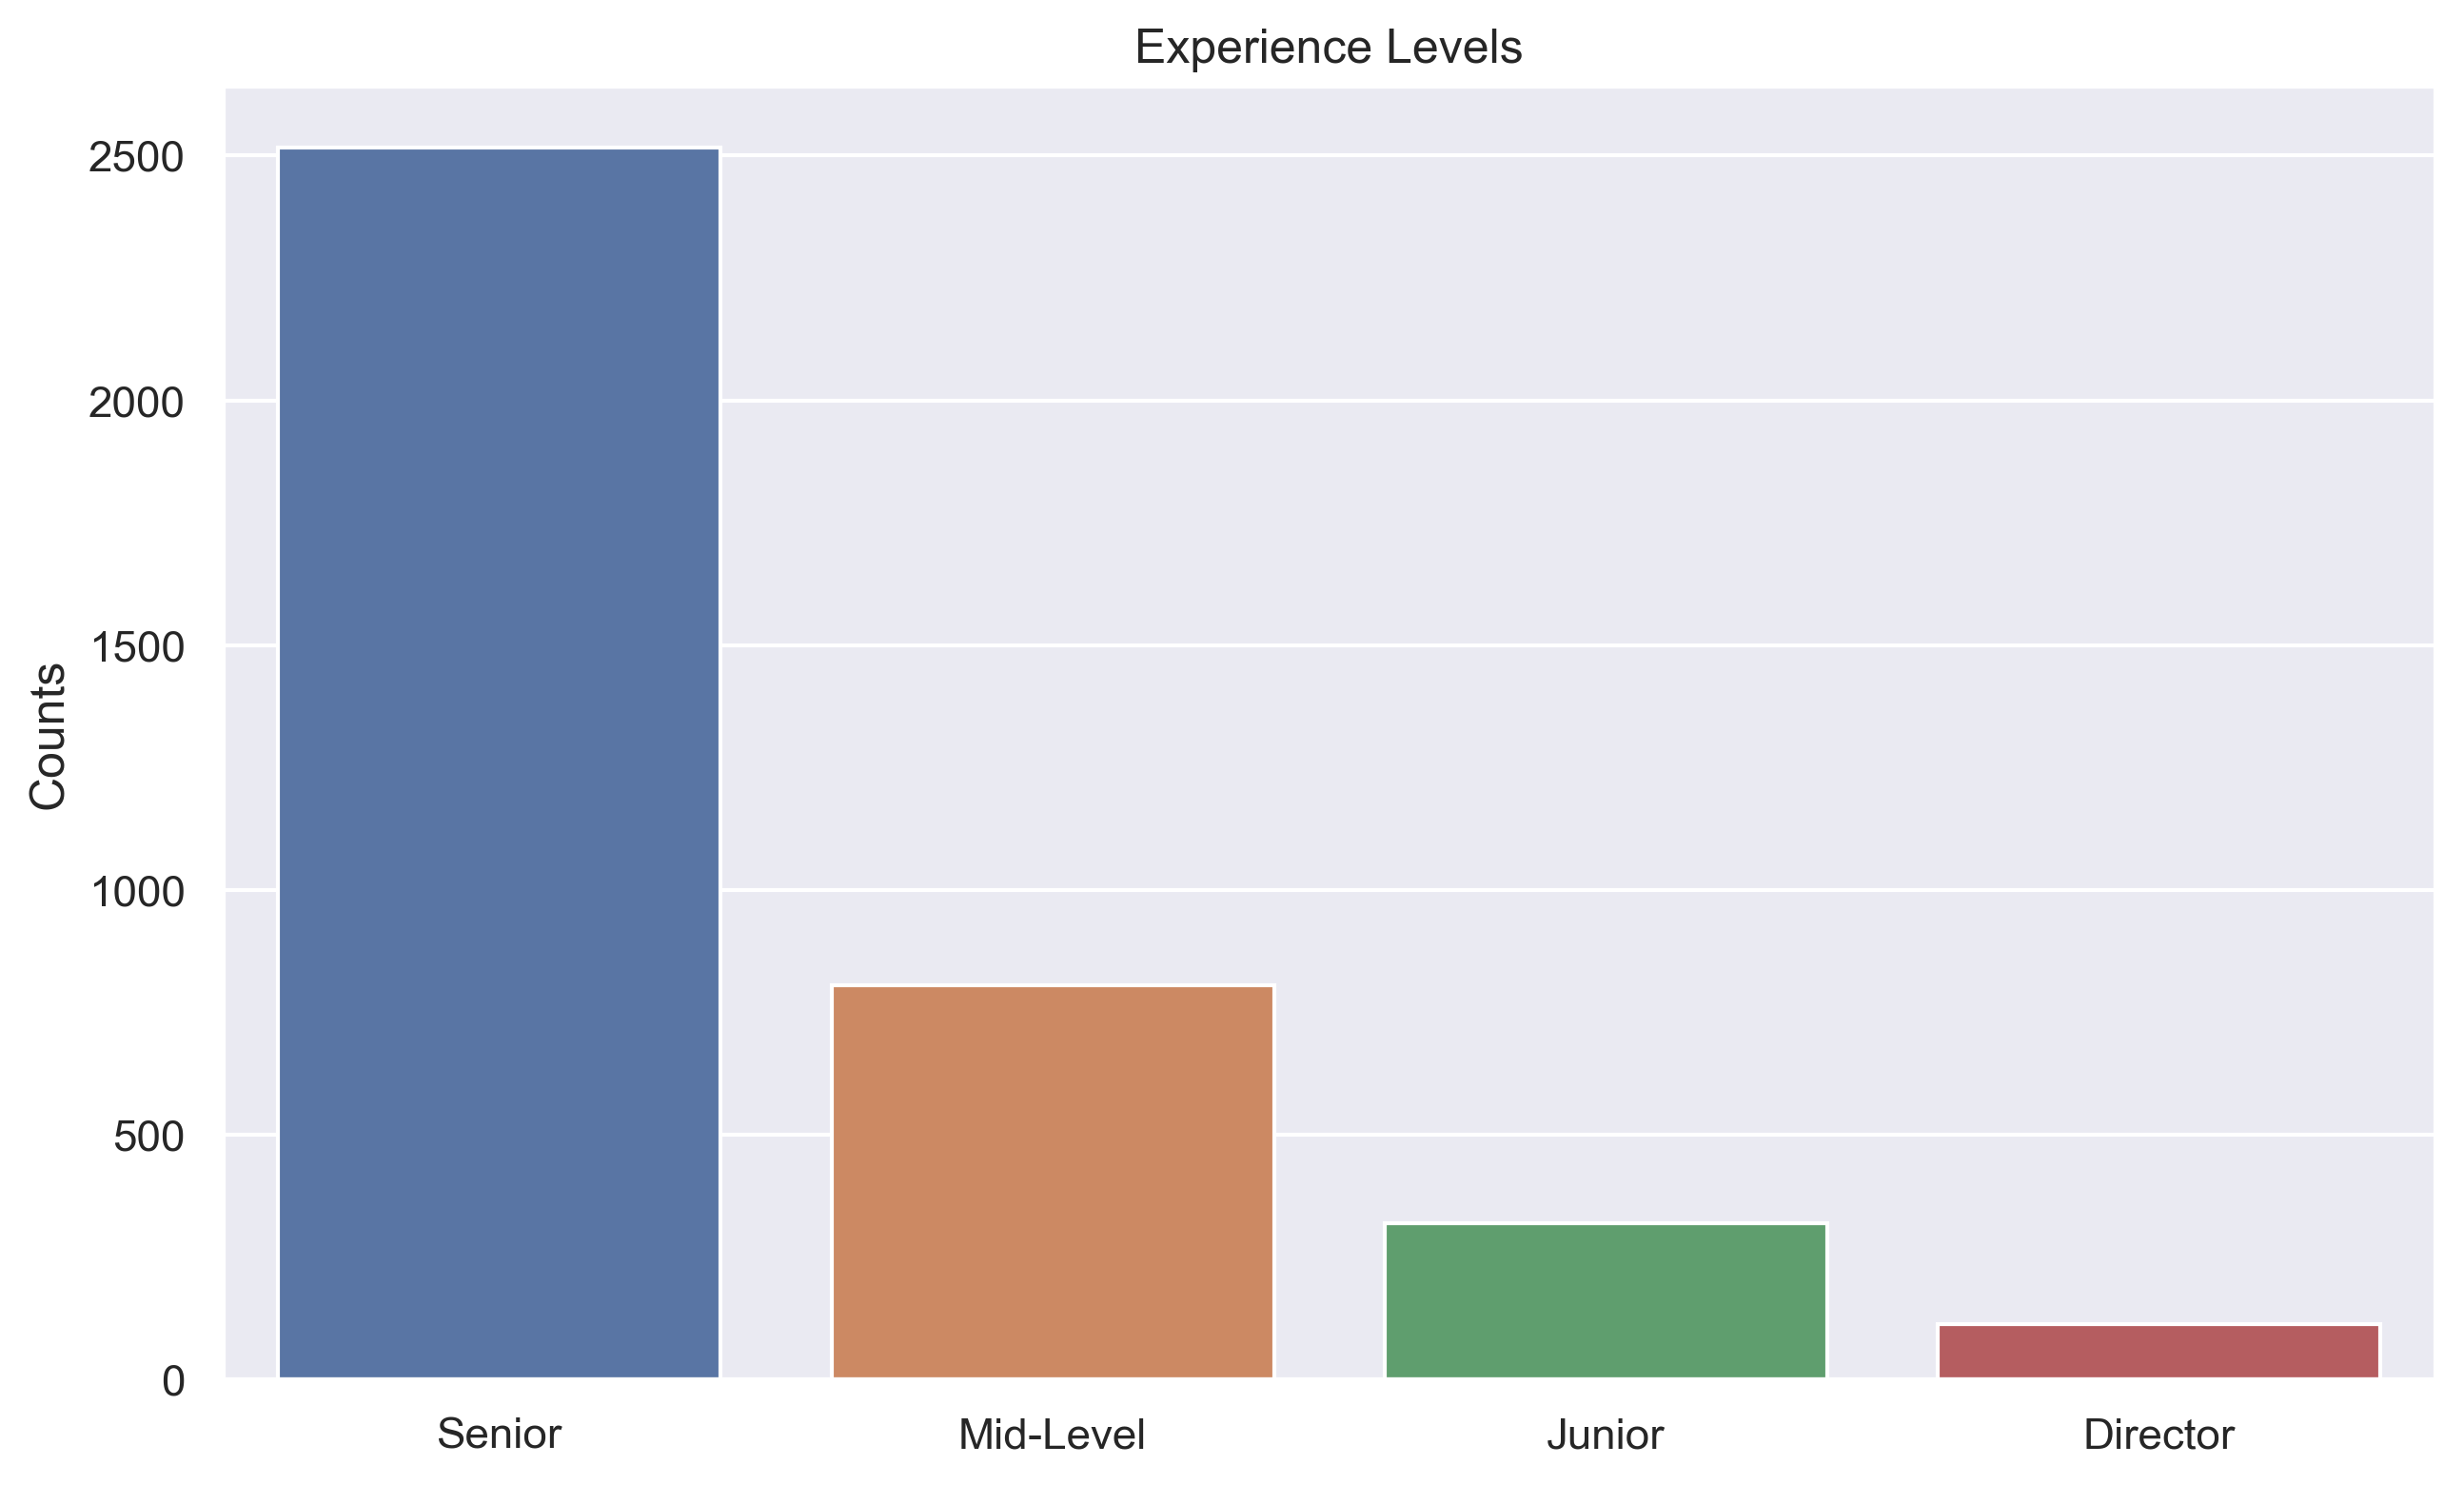

In [20]:
#şu anda tecrübe değerlerinin isimlerini değiştridik 
#şimdi bunların sayısnın sütun grafiğini çizdierlim 
#fig ve ax nesnesi alacağız yine
fig,ax=plt.subplots()
#daha sonra countplot metodu ile her bir kategorinin sayını hesaplatıyoruz 
#ax için ax data için df x argümanı için df.experinec_level yazdık
sns.countplot(ax=ax,data=df,x=df.experience_level)
#burada da eksenlere isim veriyoruz 
ax.set(xlabel="",ylabel="Counts",title="Experience Levels")

ax.bar_label(ax.containers[0])

In [23]:
#şimdi ise çalışma tiplerinebakalım 
df["employment_type"].unique()
#bu sütundaki tek değerlere bakıyoruz!!!
#şimdi bunların isimlerini değiştrileim 

array(['FT', 'CT', 'FL', 'PT'], dtype=object)

In [24]:
df["employment_type"]=df["employment_type"].replace("FT","Full-Time")
df["employment_type"]=df["employment_type"].replace("PT","Part-Time")
df["employment_type"]=df["employment_type"].replace("CT","Contract")
df["employment_type"]=df["employment_type"].replace("FL","Freelance")

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

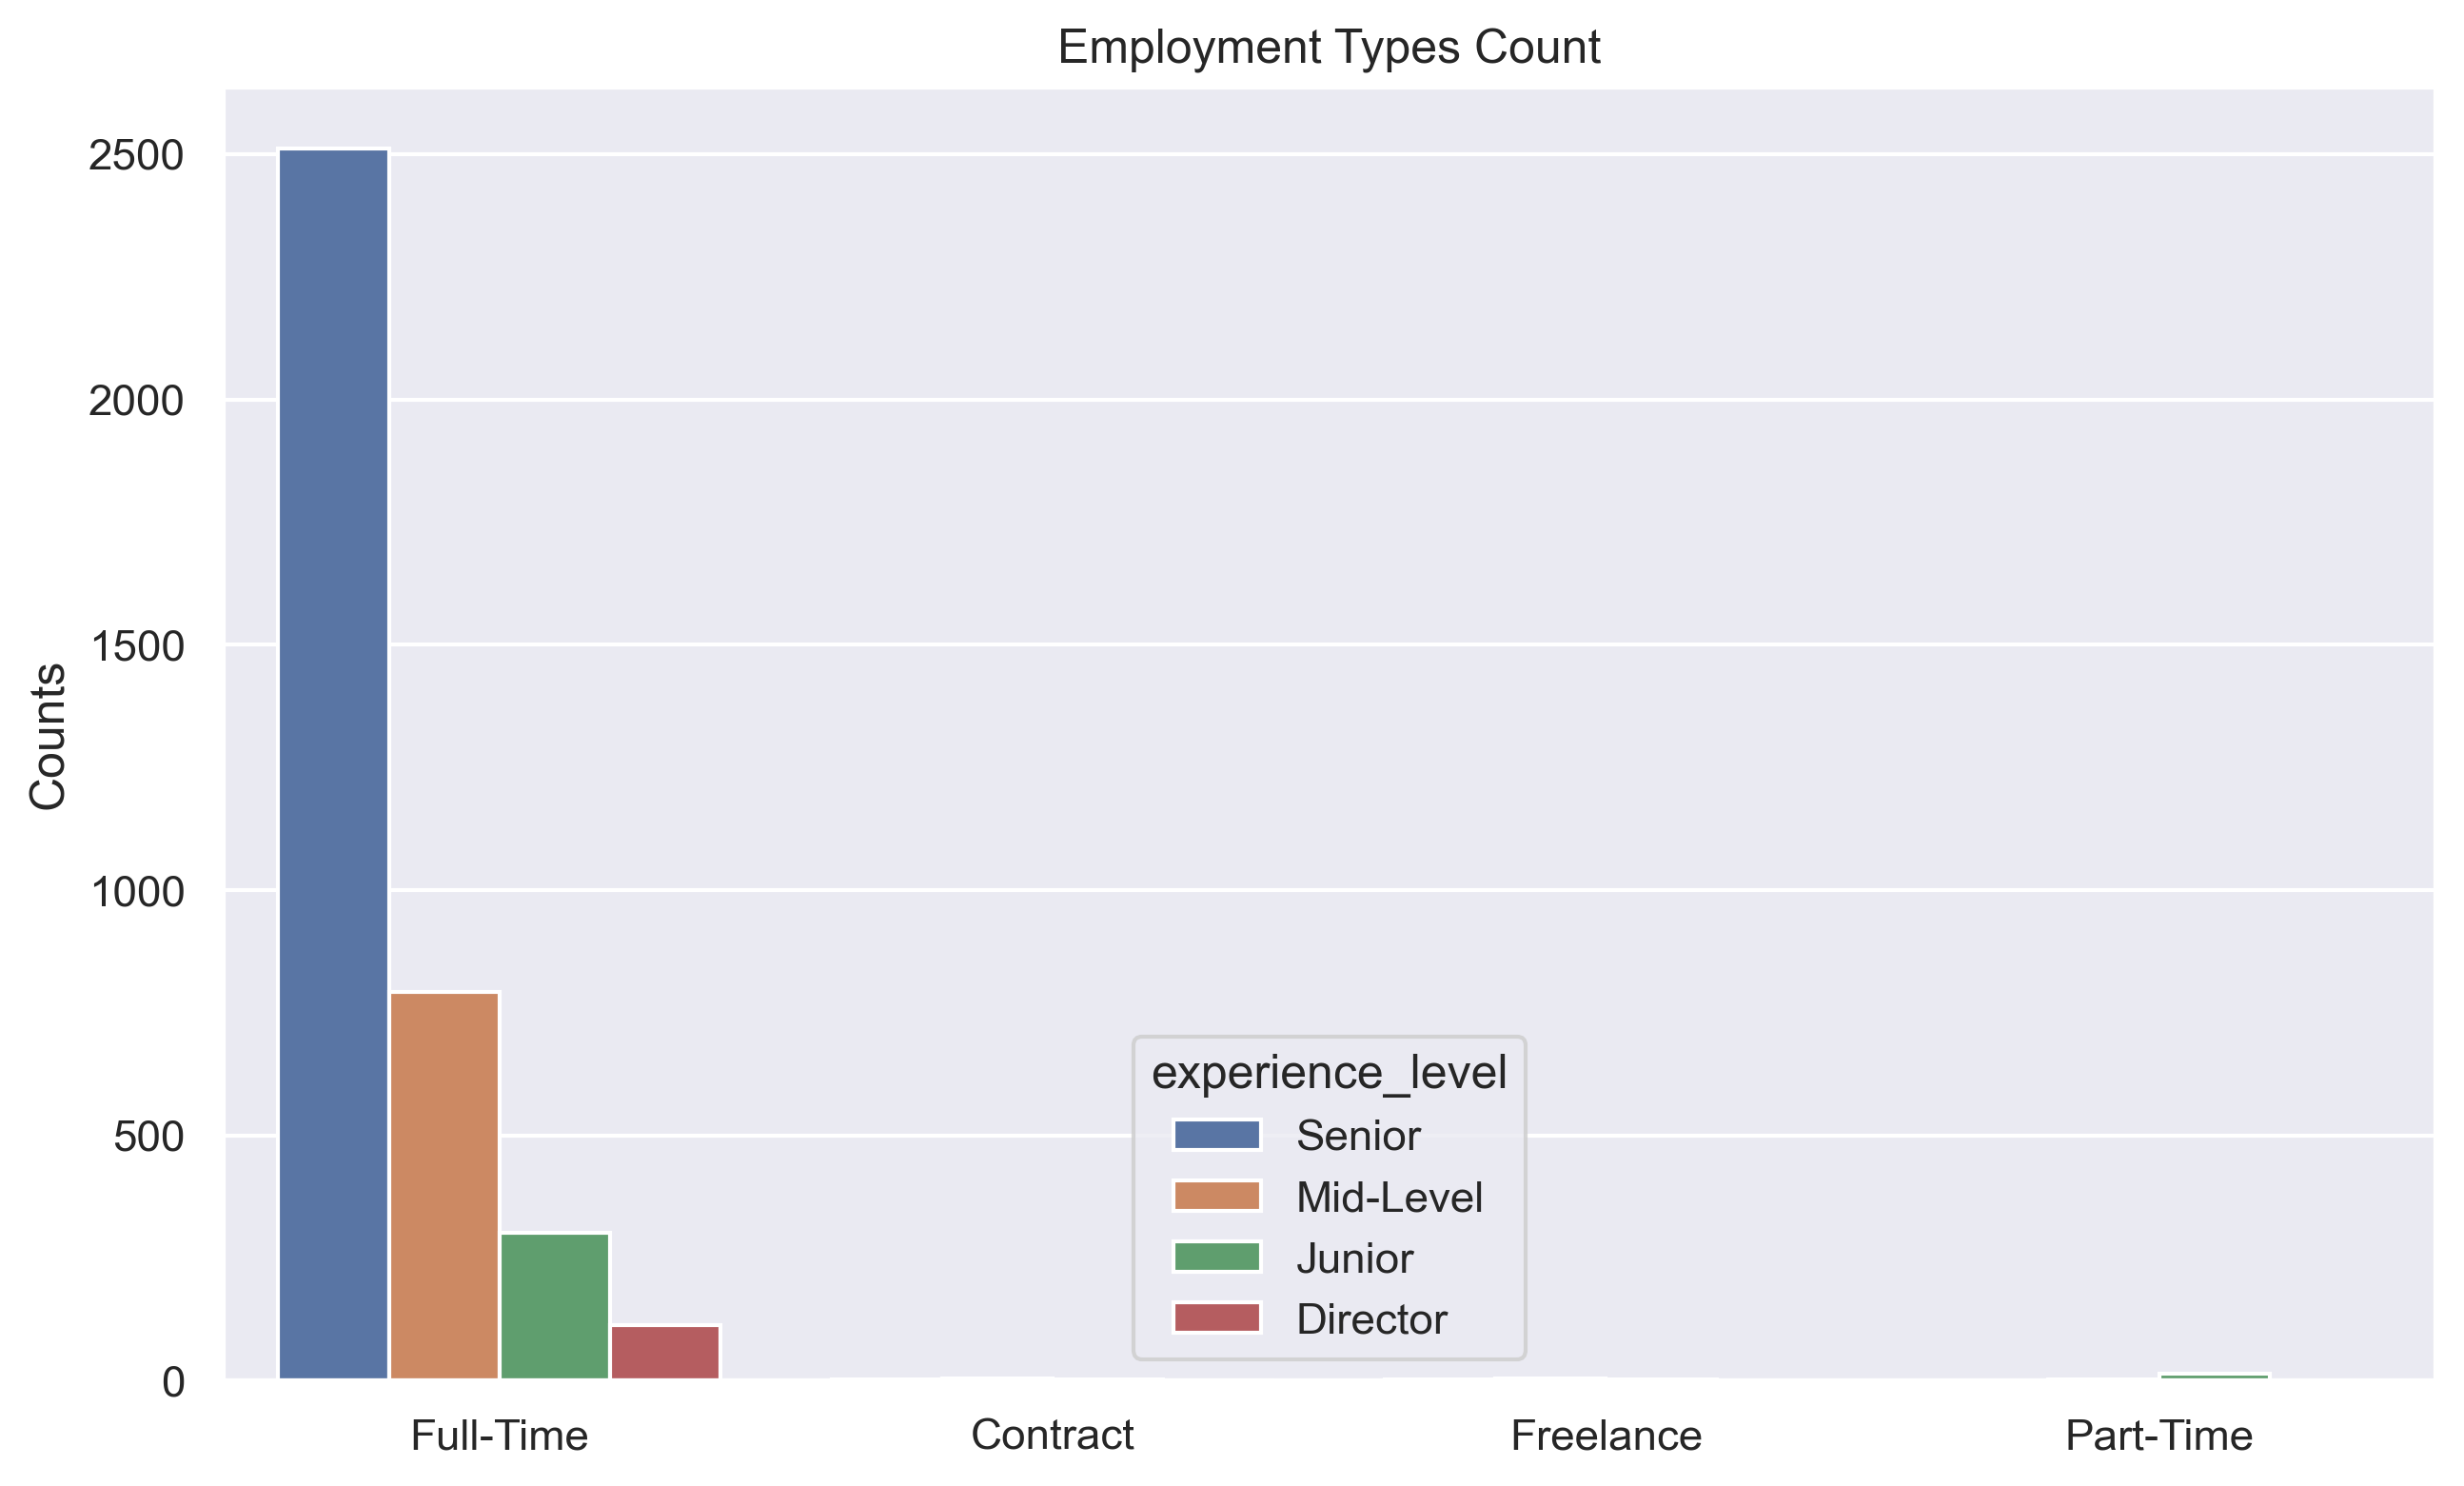

In [26]:
#tecrübe durumuna göre her bir çalışma tipinin bar grafiğini çizdirelim 
fig,ax=plt.subplots()
sns.countplot(ax=ax,data=df,x=df.employment_type,hue="experience_level")
ax.set(xlabel="",ylabel="Counts",title="Employment Types Count")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.bar_label(ax.containers[3])

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

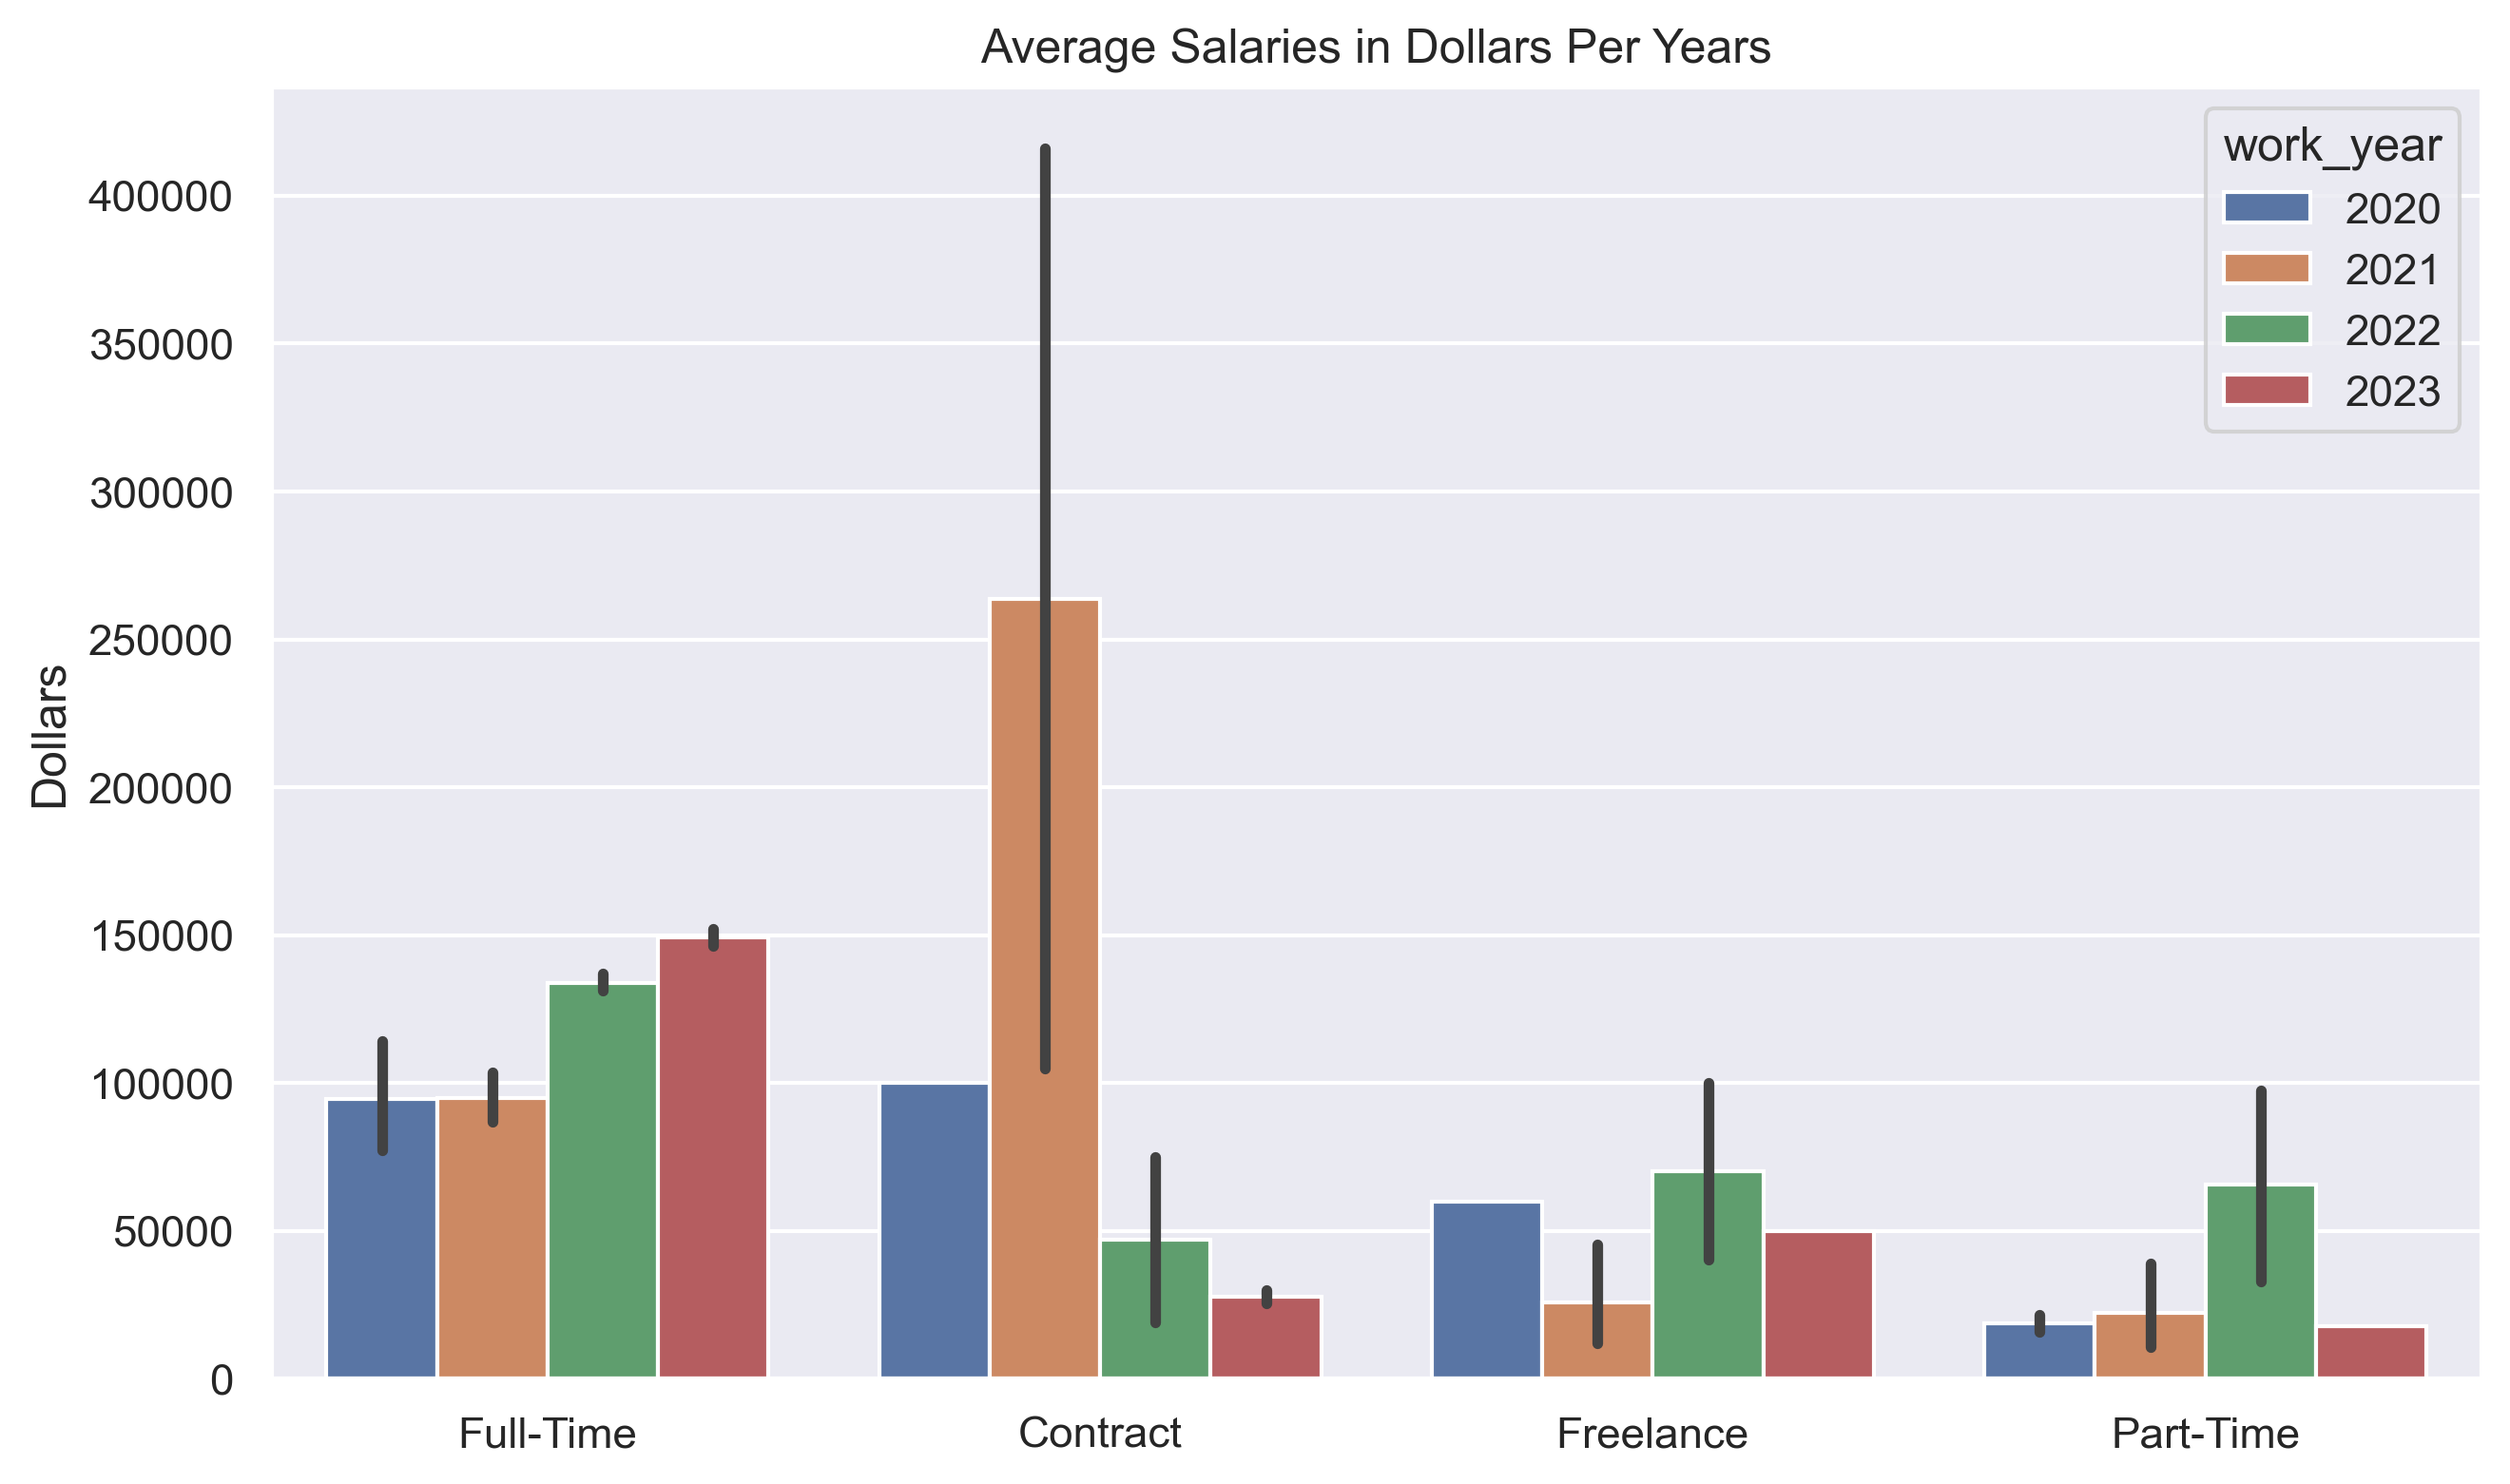

In [30]:
#şimdi de tecrübe seviyelerine göre ortalama maaşlara bakalım 
#önce çalışma tipine göre verileri gruplayalım
avg_salaries = df.groupby("employment_type")["salary_in_usd"].mean().round(0).sort_values(ascending=False).reset_index()
#salary_in_usd sütununu seçtik mean() ile bu değerlerin ortalamasını bulduk round(0) ile 0'a göre yuvarladık
#ve bu değerleri sort_values() ile sıralamak istedik daha sonra ascending=False yaparak azalan değerlere göre sıralama yaptık 
#en sonda indeksleri resetledik ardından çıkan sonuçları da avg_salaries değişkenine atadık 

#grafiği çizmek için yine grafik nesnesi oluşturuyoruz
fig,ax=plt.subplots()
sns.barplot(ax=ax,data=df,x="employment_type",y="salary_in_usd",hue="work_year")
#normalde grafik daha düzgün çıksın diye errorbar=None metodunu kullanıyoruz son sürüm olmadığı için hata veriyor
ax.set(xlabel="",ylabel="Dollars",title="Average Salaries in Dollars Per Years")
ax.bar_label(ax.containers[3],padding=2)

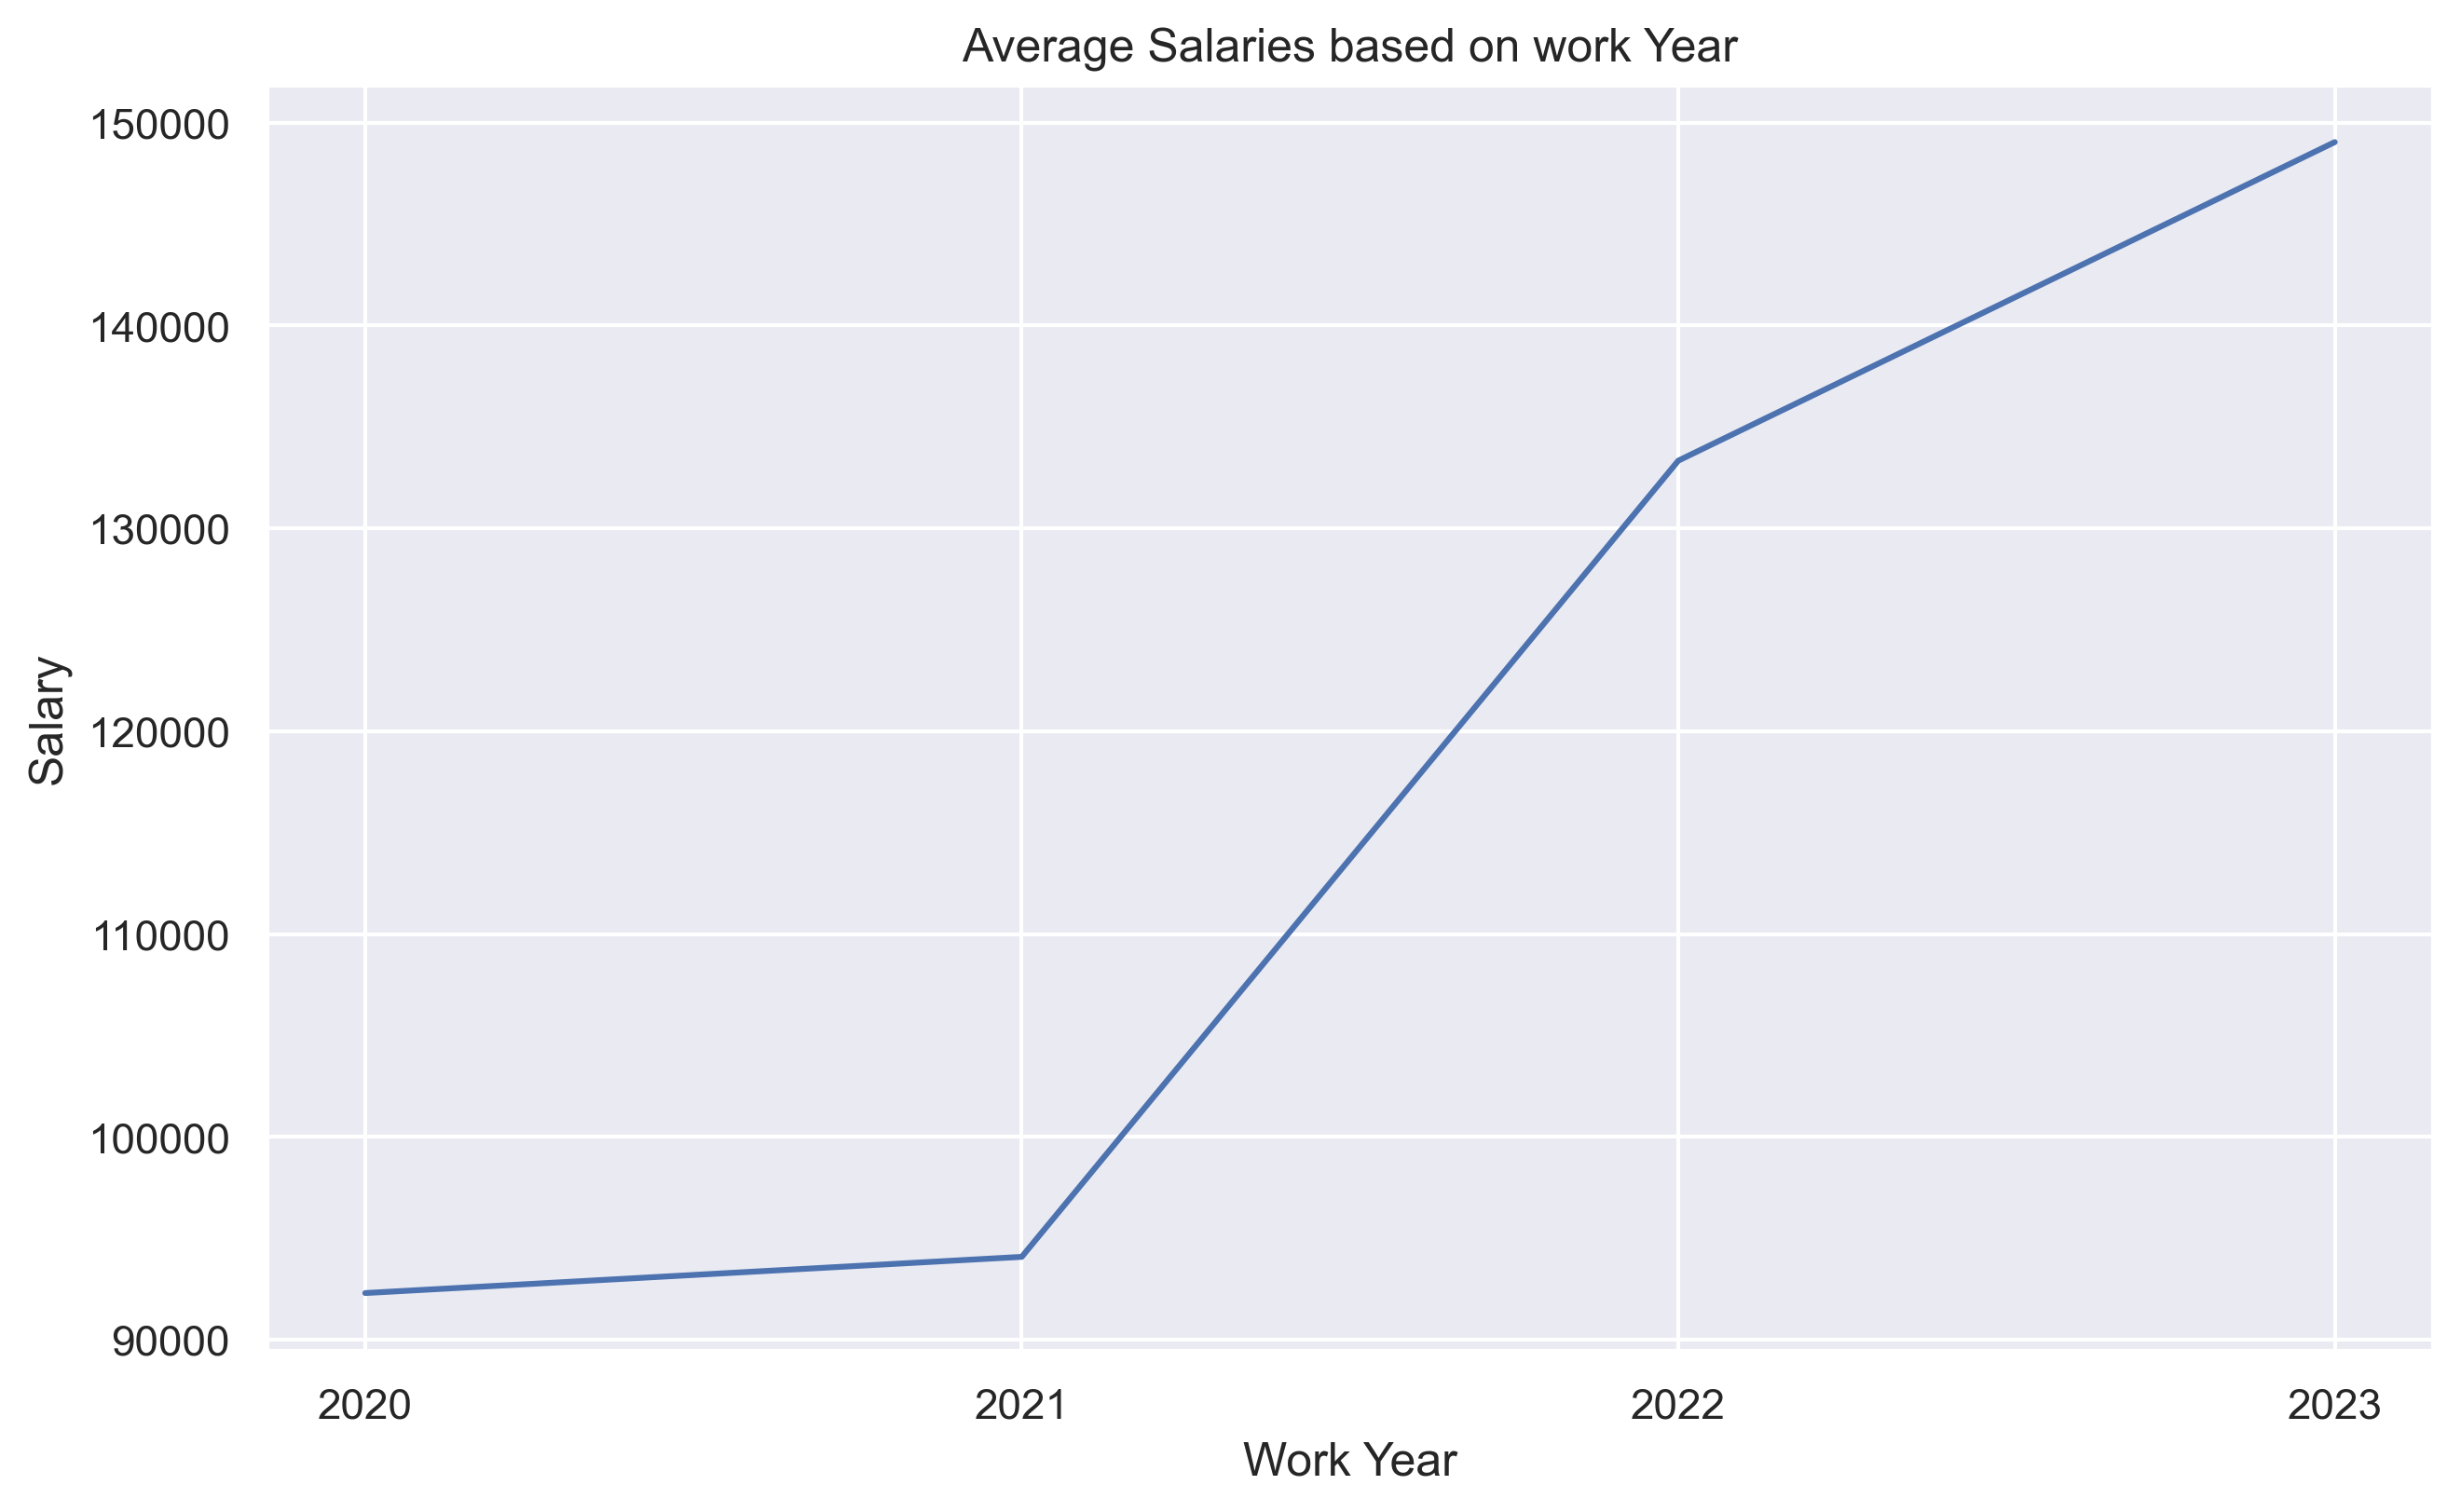

In [31]:
#beklediğimiz gibi ortalama olarak full-time çalışanlar en çok maaşı alıyorlar 
#şimdi ise yıllara göre maaş ortalamalarına bakalım
#bunun için öncelikle maaşları seçelim 
year_based_salary = df["salary_in_usd"].groupby(df["work_year"]).mean()
#öncelikle maaşları seçiyoruz grubun içerisinden yıllara göre verileri grupladık burada ve ortalamasını aldık
plt.title("Average Salaries based on work Year")
#şimdi burada grafiğe isim verdik 
plt.xlabel("Work Year")
#eksenleri isimlendirdik burada
plt.ylabel("Salary")
#eksenleri isimlendirdik burada
sns.lineplot(x=["2020","2021","2022","2023"],y=year_based_salary)
#şimdi de grafiği çizdirelim sns'in içinde lineplot kullandık x argümanını ve y argümanını verdik 
plt.show()
#bu kod ile de görüntüyü oluşturduk 

In [ ]:
#görüldüğü üzere her sene veriye dayalı mesleklerin ortalama maaşları artıyor !!!